In [60]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
from pyensembl import EnsemblRelease
import pickle
import h5py
import numpy as np
from pyensembl import EnsemblRelease
import logging
lim_logging = logging.getLogger('lim')
lim_logging.setLevel(logging.CRITICAL)

GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'

# release 77 uses human reference genome GRCh38
data = EnsemblRelease(77)

In [13]:
def get_donor_IDs(IDlist):
    return [str(x).split('-')[1] for x in IDlist]

In [181]:
genotypes_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/GenotypeFiles/phg000520.v2.GTEx_MidPoint_Imputation.genotype-calls-vcf.c1/parse_data/GTEx_Analysis_20150112_OMNI_2.5M_5M_450Indiv_chr1to22_genot_imput_info04_maf01_HWEp1E6_ConstrVarIDs_all_chrom_filered_maf_subset_individuals_44_tissues.hdf5'
with h5py.File(genotypes_filepath, 'r') as f:
    genotype_IDs = f['genotype']['row_header']['sample_ID']
    donor_genotype_IDs = get_donor_IDs(genotype_IDs)
    pos = np.array(f['genotype']['col_header']['pos'])
    chrom = np.array(f['genotype']['col_header']['chrom']).astype(str)

In [182]:
chrom == lookup.contig

array([False, False, False, ..., False, False, False], dtype=bool)

In [308]:
genes = ['SFTPB', 'SLC34A2', 'ABCA3']
indexes = {}
for g in genes:
    lookup = data.genes_by_name(g)[0]
    positions = np.bitwise_and(pos > lookup.start, pos < lookup.end, chrom == lookup.contig)
    correct_chrom_idx = chrom == lookup.contig
    correct_positions = np.bitwise_and(positions,correct_chrom_idx)
    indexes[g] = np.argwhere(correct_positions).flatten()

In [215]:
from lim.genetics import qtl
from lim.genetics.phenotype import NormalPhenotype

In [7]:
[X_matrix, y_pheno] = pickle.load(open(GTEx_directory + '/data/processed/association_data/genotype/inception_50_-1.h5/small/Lung/X_y_mean','rb'))

In [310]:
NormalPhenotype(y_pheno)

In [314]:
sm_X_matrix = X_matrix[:, indexes['ABCA3']].copy()
G = sm_X_matrix.copy()

In [315]:
lrt = qtl.scan(NormalPhenotype(y_pheno[:,537].copy()), sm_X_matrix, G, progress=False)

In [321]:
lrt.pvalues().argsort()

array([118,  19,  28,   5, 106,   9,  51,  20,  91,   3, 100, 101, 102,
       103,   6,   7,  61,   0,  40,  83,  87,  24,  81, 122,  99,  93,
        94,  79,  88,  92,  23,  73,  49, 129,  96, 137,  55,  74,  30,
        14,  11,  86, 115, 111, 109, 105,  42,  25,  15,  89,  82,  69,
       112,  35,  62, 132,  39,  26,  27,  50,  52,  70,  31,  37, 107,
        29, 126,  21,   4,  78,  63,  64,  18,  16,  43, 119, 113, 110,
        17,  12,  13,  53,  66, 139,  58,  57,  71,  80,  10,  38,   2,
        34,  33,  32,  59,  56,  41,   8, 117, 133, 125, 131,  90,  22,
        67, 127, 116,   1,  97,  76,  75,  85, 124, 135,  45, 123,  36,
       120,  68, 104, 136,  65,  98,  84,  44,  54,  60,  47,  48, 108,
        77, 114,  95, 128, 130,  72, 134,  46, 121, 138])

In [306]:
np.mean(y_pheno[:,537][sm_X_matrix[:,3] == 2])

3748.5198

In [298]:
import matplotlib.pyplot as plt
%matplotlib inline

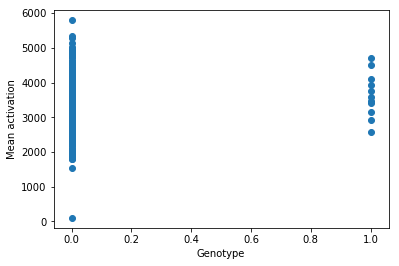

In [329]:
plt.scatter(sm_X_matrix[:,91], y_pheno[:,537])
plt.xlabel('Genotype')
plt.ylabel('Mean activation')

In [300]:
sm_X_matrix[:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)